<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/08thFeb_LDA_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
  **Hey everyone, good evening!**

  **Just in case you're grabbing a coffee, I wanted to let you know we're kicking off this seminar on Linear Discriminant Analysis (LDA) at 08:10 PM.**

## **Revision on LDA**

  **In a nutshell, LDA is a cool technique used to categorize data into different groups. It's like being a super organizer, looking for patterns in information to effectively sort things out.  Think of it like separating apples from oranges based on their size and color. LDA does something similar, but with much more complex data and multiple features!**

  **We'll be diving deeper into LDA throughout the seminar, so come prepared to unlock the mysteries of data classification!**

## **Types of Data**
  * **Linearly Seperable**
  * **Non Linearly Seperable**

## **Difference between `PCA` and `LDA`**
* **These both are dimensionality Reduction Techniques**
* **LDA is supervised & PCA is unsupervised**
* **LDA is used for maximizing the distance between two classes, whereas PCA is used for maximizing the variance / information captured**
* **LDA is generally classification-based data**

# **Step 1 - Importing Libraries**

**Configuration Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Classical Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Machine Learning Libraries**

In [ ]:
from sklearn.metrics import * # Import Everything
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# **Step 2 - Data Ingestion Phase**

### **2.1. Load Data**
**[Link to Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)**

In [ ]:
from sklearn.datasets import load_digits

### **2.2. Loading data into the environment**

In [ ]:
digits = load_digits()

### **2.3. What's inside the data**

<Figure size 640x480 with 0 Axes>

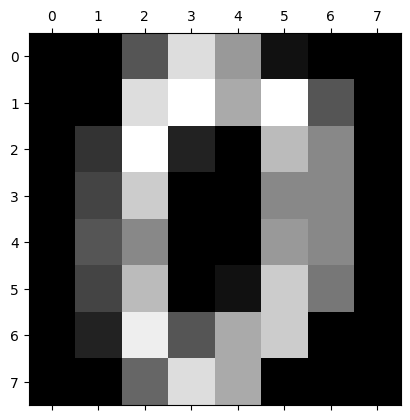

In [ ]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

### **2.4. Array version for the same**

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### **2.5. Components of this data**

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### **2.6. Converting the data into DataFrame**

In [ ]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

#### **2.6.1. Data Inspection**

In [ ]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


#### **2.6.2. Column Inspection**

In [ ]:
list(df.columns)

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

#### **2.6.3. Adding the target columns**

In [ ]:
df["Target"] = digits.target

#### **2.6.4. Shape Inspection**

In [ ]:
df.shape

(1797, 65)

# **Step 3 - Distribution of Features**

## **3.1. Dividing the data into train and test based on features**

In [ ]:
# Features Data
X = df.drop("Target", axis = 1)

# Target Data
Y = df["Target"]

## **3.2. Dividing the data into train and test based on size**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 45)

### **3.2.1. Cross Check the Data**

In [ ]:
x_train.shape, y_train.shape

((1437, 64), (1437,))

In [ ]:
x_test.shape, y_test.shape

((360, 64), (360,))

# **Step 4 - Standardize the Data**

**Where the mean ~ 0, and standard Deviation ~ 1**

### **4.1. Create an object for Standard Scaler**

In [ ]:
scaler = StandardScaler()

### **4.2. Fit the data into the scaler**

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

**Since, the majority of the data is in the x_train. So definitely the scaler will have a more better chance to get the mean based on the training data. And using the same mean and characteristic we will try to scale the testing data as well**

# **Step 5 - Linear Discriminant Analysis**

* **Here in LDA, in order to find the number of components for the data there is a formula**
  * **`n_components` = `min((number_of_opclasses - 1), (no_of_features))`**

* **Total number of classes: 10**
* **Total number of features: 64**
* **Total Number of Components: 10-1 = 9**

### **5.1. Frame a object of LDA**

In [ ]:
obj_LDA = LDA(n_components = min(10 - 1, 64))

In [ ]:
print(obj_LDA)

LinearDiscriminantAnalysis(n_components=9)


### **5.2. Fit the data into LDA**

In [ ]:
x_train = obj_LDA.fit_transform(x_train, y_train)

In [ ]:
x_test = obj_LDA.transform(x_test)

### **5.3. Shape after Transformation**

In [ ]:
x_train.shape, x_test.shape

((1437, 9), (360, 9))

### **5.4. What is the Contribution of each feature in framing the line**

In [ ]:
pd.DataFrame(obj_LDA.coef_)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,3.264495e-17,-0.281554,0.084274,0.699288,-0.660953,-2.821995,0.445948,-0.105277,0.055249,-0.576242,...,-1.313926,0.054425,-0.328737,0.344687,-0.150040,-0.254558,0.104806,-0.622324,0.430761,-0.812061
1,-1.930452e-17,-0.037941,0.344381,0.117934,-1.519680,1.061025,-0.656725,0.144307,-0.231126,-0.220448,...,-0.597947,0.657954,-0.239563,0.074165,-1.787354,0.191104,1.176404,1.600678,-0.656132,1.157225
2,-3.880459e-17,-0.579115,-0.394396,-0.247720,-0.501801,0.468193,0.234932,-0.345482,-0.204311,1.276417,...,2.424457,-0.249690,1.079111,0.429960,0.340201,0.543037,0.301759,1.849628,2.785474,-0.210942
3,5.910019e-19,-0.332386,-0.893403,1.171365,0.860591,1.085142,-0.186414,-0.258902,-0.194502,0.870655,...,0.738904,-0.282059,0.808791,0.508504,1.495536,-0.055065,0.350091,0.521634,-0.231638,-0.141327
4,-1.913338e-17,0.342309,-0.357956,-2.176710,0.045233,-3.069420,-1.136347,0.710378,0.043595,0.722818,...,-1.178330,0.269301,-0.851432,-0.359187,-0.161138,-0.243884,1.262636,-1.532070,-0.722420,0.182225
5,4.591556e-17,0.032808,1.645762,0.036524,1.430477,3.093162,1.868914,-1.016013,0.182521,-0.897828,...,-1.550501,0.227910,0.092075,0.274370,1.346305,0.922707,-1.660042,-0.209760,-0.317329,-0.917881
6,-8.096250e-18,0.183819,-1.630300,-0.811934,0.048181,-0.515923,-0.778949,-0.030533,0.173615,-0.266304,...,0.727647,-1.020361,-0.277649,-0.066920,0.549945,0.133998,0.081092,0.459158,-0.207770,-0.011835
7,4.343565e-17,0.973312,-0.194479,0.759282,0.633868,1.119200,1.291436,1.178596,0.250198,-0.893310,...,-0.058395,0.240721,-0.344236,-1.400297,0.667633,-0.321775,-3.397195,-0.341285,-1.063513,0.735595
8,-2.554310e-17,-0.090756,0.922380,-0.773106,0.009374,-0.164247,-1.244245,0.103138,0.040600,0.039217,...,0.575319,-0.093163,0.173280,-0.049858,-2.029416,0.082284,0.888602,-1.257657,-0.009380,0.546856
9,-1.625250e-17,-0.161194,0.292634,1.072104,-0.315483,-0.464339,-0.006803,-0.261080,-0.112200,0.069364,...,0.411455,0.142425,-0.129303,0.162765,-0.256717,-1.061588,0.944113,-0.551882,-0.028891,-0.447746


### **5.5. Total Explained Variance**

In [ ]:
sum(obj_LDA.explained_variance_ratio_)

0.9999999999999998

#### **5.5.1. Information given by the first feature**

In [ ]:
obj_LDA.explained_variance_ratio_[0]

0.27682121521853453

#### **5.5.2. Information given by the second feature**

In [ ]:
obj_LDA.explained_variance_ratio_[1]

0.18291650204146198

# **Step 6 - Model Building**

In [ ]:
x_train.shape, x_test.shape

((1437, 9), (360, 9))

### **6.1. Build a RF Classifier**

In [ ]:
model = RandomForestClassifier()

### **6.2. Fit the model with the data**

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

### **6.3. Test the model**

In [ ]:
pred = model.predict(x_test)

### **6.4. Check for Accuracy**

In [ ]:
print(f"The accuracy: {accuracy_score(y_test, pred)}")

The accuracy: 0.9388888888888889


#### **6.4.1. Classification Report**

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.91      0.94        33
           2       0.94      0.97      0.96        35
           3       0.95      0.93      0.94        41
           4       0.98      0.98      0.98        45
           5       0.96      0.90      0.93        30
           6       0.98      0.98      0.98        41
           7       0.93      0.95      0.94        39
           8       0.84      0.84      0.84        32
           9       0.85      0.92      0.88        37

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



#### **6.4.2. Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test, pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  2  1]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  1  0  0  1  0]
 [ 0  0  0  0 44  0  0  1  0  0]
 [ 0  0  0  1  0 27  0  0  1  1]
 [ 0  0  0  0  1  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  2]
 [ 0  0  1  0  0  0  1  1 27  2]
 [ 0  0  0  1  0  0  0  1  1 34]]


# **Step 7 - Visualize**

### **2D for maximizing the Distance**

In [ ]:
import plotly.express as px
fig = px.scatter(df, x = x_train[:,8], y = y_train,
                 labels={
                     "x": "LD1",
                     "y": "LD2",
                 },
                 opacity=1, color = y_train)


fig.update_layout(dict(plot_bgcolor = 'white'))


fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',
                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',
                 showline=True, linewidth=1, linecolor='black')


fig.update_layout(title_text="LDA Plot")

fig.update_traces(marker=dict(size=3))

fig.show()

### **3D Visualization for maximizing the distance**

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = x_train[:,0], y = y_train, z = x_train[:,1],
                    labels={
                        "x": "LD1",
                        "y": "LD2",
                        "z": "LD3"
                    },
                    opacity=1, color = y_train)

fig.update_layout(scene=dict(xaxis_backgroundcolor="white",
                             yaxis_backgroundcolor="white",
                             zaxis_backgroundcolor="white"))

fig.update_layout(scene=dict(xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='lightgrey',
                             xaxis_zeroline=True, xaxis_zerolinewidth=1, xaxis_zerolinecolor='lightgrey',
                             xaxis_showline=True, xaxis_linewidth=1, xaxis_linecolor='black',
                             yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='lightgrey',
                             yaxis_zeroline=True, yaxis_zerolinewidth=1, yaxis_zerolinecolor='lightgrey',
                             yaxis_showline=True, yaxis_linewidth=1, yaxis_linecolor='black',
                             zaxis_showgrid=True, zaxis_gridwidth=1, zaxis_gridcolor='lightgrey',
                             zaxis_zeroline=True, zaxis_zerolinewidth=1, zaxis_zerolinecolor='lightgrey',
                             zaxis_showline=True, zaxis_linewidth=1, zaxis_linecolor='black'))

fig.update_layout(title_text="3D LDA Scatter Plot")

fig.update_traces(marker=dict(size=3))

fig.show()
